# 一口氣下載多支上市台股個股歷史資料！

# Part 0: Import 套件

In [1]:
# 下載資料套件
import requests as r

# 資料處理套件
from lxml import etree
import json
from datetime import datetime, date
import pandas as pd

# 財經套件
import yfinance as yf

# 畫圖套件
import plotly.graph_objects as go

如果沒有上述套件 可以用pip install 或 conda install 指令安裝
1. pip install
    - pip install plotly
    - pip install yfinance
    - pip install lxml
2. conda install
    - conda install -c plotly plotly

# Part 1: 取得全部台股上市個股的股票代碼
資料來源：[上市證券國際證券辨識號碼一覽表](https://isin.twse.com.tw/isin/C_public.jsp?strMode=2)

In [2]:
url = 'https://isin.twse.com.tw/isin/C_public.jsp?strMode=2'

In [3]:
def twse_stock_info():
    # 下載上市證券國際證券辨識號碼一覽表
    url = 'https://isin.twse.com.tw/isin/C_public.jsp?strMode=2'
    res = r.get(url)
    root = etree.HTML(res.text)
    data = root.xpath('//tr')[1:]
    
    # 設定DataFrame儲存資料
    df = pd.DataFrame(columns = ["上市有價證券種類", "有價證券代號代碼", "有價證券代號名稱", "國際證券辨識號碼(ISIN Code", "上市日", "市場別", "產業別", "CFICode", "備註"])
    
    # 將資料一行一行存入DataFrame內
    category = ''
    row_num = 0
    for row in data:
        row = list(map(lambda x: x.text, row.iter()))[1:]
        if len(row) == 3:
            category = row[1].strip(' ')
        else:
            stock_code, stock_name = row[0].split('\u3000')
            data_row = [category, stock_code, stock_name, row[1], row[2], row[3], row[4], row[5], row[6]]
            df.loc[row_num] = data_row
            row_num += 1
    
    return df

In [4]:
stock_info_df = twse_stock_info()
stock_info_df

,上市有價證券種類,有價證券代號代碼,有價證券代號名稱,國際證券辨識號碼(ISIN Code,上市日,市場別,產業別,CFICode,備註
0,股票,1101,台泥,TW0001101004,1962/02/09,上市,水泥工業,ESVUFR,None
1,股票,1102,亞泥,TW0001102002,1962/06/08,上市,水泥工業,ESVUFR,None
2,股票,1103,嘉泥,TW0001103000,1969/11/14,上市,水泥工業,ESVUFR,None
3,股票,1104,環泥,TW0001104008,1971/02/01,上市,水泥工業,ESVUFR,None
4,股票,1108,幸福,TW0001108009,1990/06/06,上市,水泥工業,ESVUFR,None
...,...,...,...,...,...,...,...,...,...
23689,受益證券-不動產投資信託,01003T,兆豐新光R1,TW00001003T4,2005/12/26,上市,None,CBCIXU,None
23690,受益證券-不動產投資信託,01004T,土銀富邦R2,TW00001004T2,2006/04/13,上市,None,CBCIXU,None
23691,受益證券-不動產投資信託,01007T,兆豐國泰R2,TW00001007T5,2006/10/13,上市,None,CBCIXU,None
23692,受益證券-不動產投資信託,01009T,王道圓滿R1,TW00001009T1,2018/06/21,上市,None,CBCIXU,None


### 取得所有上市有價證券代號代碼

In [5]:
stock_info_df['有價證券代號代碼']

0          1101
1          1102
2          1103
3          1104
4          1108
          ...  
23689    01003T
23690    01004T
23691    01007T
23692    01009T
23693    01010T
Name: 有價證券代號代碼, Length: 23694, dtype: object

### 取得所有上市半導體產業的股票代碼

In [6]:
semi_df = stock_info_df.loc[(stock_info_df['上市有價證券種類']  == '股票') & (stock_info_df['產業別'] == '半導體業')]
semi_df

,上市有價證券種類,有價證券代號代碼,有價證券代號名稱,國際證券辨識號碼(ISIN Code,上市日,市場別,產業別,CFICode,備註
261,股票,2302,麗正,TW0002302007,1985/01/15,上市,半導體業,ESVUFR,None
262,股票,2303,聯電,TW0002303005,1985/07/16,上市,半導體業,ESVUFR,None
275,股票,2329,華泰,TW0002329000,1994/04/20,上市,半導體業,ESVUFR,None
276,股票,2330,台積電,TW0002330008,1994/09/05,上市,半導體業,ESVUFR,None
279,股票,2337,旺宏,TW0002337003,1995/03/15,上市,半導體業,ESVUFR,None
...,...,...,...,...,...,...,...,...,...
875,股票,8110,華東,TW0008110008,2007/10/31,上市,半導體業,ESVUFR,None
878,股票,8131,福懋科,TW0008131004,2007/11/29,上市,半導體業,ESVUFR,None
879,股票,8150,南茂,TW0008150004,2014/04/11,上市,半導體業,ESVUFR,None
887,股票,8261,富鼎,TW0008261009,2009/12/11,上市,半導體業,ESVUFR,None


In [7]:
stock_code_list = list(semi_df['有價證券代號代碼'])
stock_code_list

['2302',
 '2303',
 '2329',
 '2330',
 '2337',
 '2338',
 '2342',
 '2344',
 '2351',
 '2363',
 '2369',
 '2379',
 '2388',
 '2401',
 '2408',
 '2434',
 '2436',
 '2441',
 '2449',
 '2451',
 '2454',
 '2458',
 '2481',
 '3006',
 '3014',
 '3016',
 '3034',
 '3035',
 '3041',
 '3054',
 '3094',
 '3189',
 '3257',
 '3413',
 '3443',
 '3450',
 '3530',
 '3532',
 '3536',
 '3545',
 '3583',
 '3588',
 '3661',
 '3686',
 '3711',
 '4919',
 '4952',
 '4961',
 '4967',
 '4968',
 '5269',
 '5285',
 '5471',
 '6202',
 '6239',
 '6243',
 '6257',
 '6271',
 '6415',
 '6451',
 '6515',
 '6525',
 '6531',
 '6533',
 '6552',
 '6573',
 '6756',
 '8016',
 '8028',
 '8081',
 '8110',
 '8131',
 '8150',
 '8261',
 '8271']

# Part 2: 從證交所下載多支上市個股
## 2.1 從證交所下載單一台股個股歷史走勢資料

- 股海小英雄youtube影片：[【Python 爬蟲】台股個股資料免費下載｜選擇想要的個股資料！](https://youtu.be/_4CEymrQbV8)
- 資料來源：[證交所 個股日成交資訊](https://www.twse.com.tw/zh/page/trading/exchange/STOCK_DAY.html)

In [8]:
def get_tw_stock_data(start_year, start_month, end_year, end_month, stock_code):
    start_date = str(date(start_year, start_month, 1))
    end_date = str(date(end_year, end_month, 1))
    month_list = pd.date_range(start_date, end_date, freq='MS').strftime("%Y%m%d").tolist()
    
    df = pd.DataFrame()
    for month in month_list:
        url = "https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date="+ month + "&stockNo=" + str(stock_code)
        res = r.get(url)
        stock_json = res.json()
        stock_df = pd.DataFrame.from_dict(stock_json['data'])
        df = df.append(stock_df, ignore_index = True)
        
    # 資料轉型
    for col in [0, 1, 2, 3, 4, 5, 6, 8]:
        for row in range(df.shape[0]):
            # 把"日期"從字串(string)換成時間(datetime)，並將民國年換成西元年
            if col == 0:
                day = df.iloc[row,0].split('/')
                df.iloc[row, 0] = datetime(int(day[0]) + 1911, int(day[1]), int(day[2]))  
            # 把"開盤價", "最高價", "最低價", "收盤價"帶有逗號的字串(string)換成浮點數(float) 
            elif col != 0:
                df.iloc[row, col] = float(df.iloc[row,col].replace(',', ''))
    
    df.columns = ['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數']
    return df

In [9]:
stock_df = get_tw_stock_data(start_year = 2021, 
                             start_month = 8, 
                             end_year = 2021, 
                             end_month = 9, 
                             stock_code = 2330)
stock_df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2021-08-02 00:00:00,24948096.0,14593329483.0,583.0,590.0,580.0,590.0,+10.00,19791.0
1,2021-08-03 00:00:00,28104984.0,16655446605.0,594.0,594.0,590.0,594.0,+4.00,20221.0
2,2021-08-04 00:00:00,23714971.0,14132827829.0,598.0,598.0,594.0,596.0,+2.00,18228.0
3,2021-08-05 00:00:00,15673765.0,9343887536.0,598.0,598.0,593.0,596.0,0.00,15495.0
4,2021-08-06 00:00:00,13994018.0,8275142201.0,596.0,596.0,588.0,591.0,-5.00,13742.0
5,2021-08-09 00:00:00,17611955.0,10366798182.0,590.0,595.0,583.0,595.0,+4.00,15068.0
6,2021-08-10 00:00:00,17620825.0,10435618093.0,596.0,596.0,589.0,591.0,-4.00,13983.0
7,2021-08-11 00:00:00,20311399.0,11943131619.0,590.0,590.0,585.0,590.0,-1.00,18548.0
8,2021-08-12 00:00:00,16031265.0,9383967628.0,586.0,588.0,584.0,586.0,-4.00,15202.0
9,2021-08-13 00:00:00,25440973.0,14769155709.0,585.0,585.0,579.0,581.0,-5.00,36198.0


## 2.2 從證交所下載多支台股個股歷史走勢資料

In [10]:
stock_code_list = ['2454', '1590', '6669']

In [11]:
df = pd.DataFrame()

In [12]:
for stock_code in stock_code_list:
    stock_df = get_tw_stock_data(start_year = 2021, 
                                 start_month = 9, 
                                 end_year = 2021, 
                                 end_month = 9, 
                                 stock_code = stock_code)
    df = df.append(stock_df, ignore_index = True)

In [13]:
df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2021-09-01 00:00:00,9426404.0,8682486888.0,917.0,930.0,906.0,927.0,+26.00,11910.0
1,2021-09-02 00:00:00,5835912.0,5453594073.0,930.0,945.0,927.0,933.0,+6.00,7530.0
2,2021-09-03 00:00:00,5982064.0,5518704279.0,938.0,938.0,917.0,919.0,-14.00,6585.0
3,2021-09-06 00:00:00,8507094.0,7686402319.0,907.0,917.0,895.0,896.0,-23.00,10893.0
4,2021-09-07 00:00:00,3756993.0,3384475936.0,901.0,907.0,897.0,903.0,+7.00,3952.0
5,2021-09-08 00:00:00,5405988.0,4901792058.0,899.0,914.0,895.0,912.0,+9.00,4710.0
6,2021-09-09 00:00:00,6326324.0,5699357147.0,903.0,908.0,898.0,901.0,-11.00,5278.0
7,2021-09-10 00:00:00,4863848.0,4460103582.0,903.0,925.0,902.0,925.0,+24.00,6005.0
8,2021-09-01 00:00:00,633834.0,554185243.0,845.0,894.0,845.0,876.0,+31.00,754.0
9,2021-09-02 00:00:00,1437249.0,1312724796.0,870.0,939.0,867.0,904.0,+28.00,1580.0


### 怎麼區分不同個股？

In [14]:
df = pd.DataFrame()

In [15]:
for stock_code in stock_code_list:
    stock_df = get_tw_stock_data(start_year = 2021, 
                                 start_month = 9, 
                                 end_year = 2021, 
                                 end_month = 9, 
                                 stock_code = stock_code)
    stock_df.insert(0, '股票代碼', stock_code)
    df = df.append(stock_df, ignore_index = True)

In [16]:
df

,股票代碼,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2454,2021-09-01 00:00:00,9426404.0,8682486888.0,917.0,930.0,906.0,927.0,+26.00,11910.0
1,2454,2021-09-02 00:00:00,5835912.0,5453594073.0,930.0,945.0,927.0,933.0,+6.00,7530.0
2,2454,2021-09-03 00:00:00,5982064.0,5518704279.0,938.0,938.0,917.0,919.0,-14.00,6585.0
3,2454,2021-09-06 00:00:00,8507094.0,7686402319.0,907.0,917.0,895.0,896.0,-23.00,10893.0
4,2454,2021-09-07 00:00:00,3756993.0,3384475936.0,901.0,907.0,897.0,903.0,+7.00,3952.0
5,2454,2021-09-08 00:00:00,5405988.0,4901792058.0,899.0,914.0,895.0,912.0,+9.00,4710.0
6,2454,2021-09-09 00:00:00,6326324.0,5699357147.0,903.0,908.0,898.0,901.0,-11.00,5278.0
7,2454,2021-09-10 00:00:00,4863848.0,4460103582.0,903.0,925.0,902.0,925.0,+24.00,6005.0
8,1590,2021-09-01 00:00:00,633834.0,554185243.0,845.0,894.0,845.0,876.0,+31.00,754.0
9,1590,2021-09-02 00:00:00,1437249.0,1312724796.0,870.0,939.0,867.0,904.0,+28.00,1580.0


In [17]:
def get_multi_tw_stock_data(stock_code_list):
    df = pd.DataFrame()
    for stock_code in stock_code_list:
        stock_df = get_tw_stock_data(start_year = 2021, 
                                     start_month = 4, 
                                     end_year = 2021, 
                                     end_month = 6, 
                                     stock_code = stock_code)
        stock_df.insert(0, '股票代碼', stock_code)
        df = df.append(stock_df, ignore_index = True)
    return df

In [18]:
df = get_multi_tw_stock_data(stock_code_list)

In [19]:
df

,股票代碼,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2454,2021-04-01 00:00:00,5773029.0,5608220878.0,978.0,985.0,961.0,961.0,-8.00,6689.0
1,2454,2021-04-06 00:00:00,12518802.0,12496987935.0,985.0,1010.0,984.0,995.0,+34.00,16844.0
2,2454,2021-04-07 00:00:00,5555761.0,5544597573.0,1005.0,1010.0,988.0,998.0,+3.00,5914.0
3,2454,2021-04-08 00:00:00,8167263.0,8237103462.0,988.0,1030.0,985.0,1020.0,+22.00,9501.0
4,2454,2021-04-09 00:00:00,6835494.0,6928197672.0,1025.0,1030.0,999.0,999.0,-21.00,6586.0
...,...,...,...,...,...,...,...,...,...,...
178,6669,2021-06-24 00:00:00,695098.0,688068634.0,980.0,1005.0,976.0,995.0,+25.00,854.0
179,6669,2021-06-25 00:00:00,544070.0,541640451.0,1010.0,1010.0,984.0,990.0,-5.00,585.0
180,6669,2021-06-28 00:00:00,567597.0,555502883.0,988.0,1005.0,969.0,983.0,-7.00,542.0
181,6669,2021-06-29 00:00:00,421490.0,418324883.0,996.0,1005.0,978.0,991.0,+8.00,548.0


# Part 3: 從Yahoo財經(yahoo finance)下載多支上市個股
## 3.1 從Yahoo財經下載單一台股個股歷史走勢資料

- 股海小英雄youtube影片：[【Python 股票】美股個股資料免費下載｜用Yahoo財經套件(yfinance)取得資料｜擺脫限制](https://youtu.be/ZIFmDbIb-ro)

In [20]:
yf_df = yf.download("2330.TW", "2021-09-01", "2021-09-10")
yf_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-01,614.0,614.0,608.0,613.0,613.0,30092045
2021-09-02,613.0,615.0,607.0,607.0,607.0,24112463
2021-09-03,610.0,620.0,610.0,620.0,620.0,51562454
2021-09-06,623.0,638.0,621.0,631.0,631.0,55589014
2021-09-07,634.0,634.0,623.0,623.0,623.0,26526056
2021-09-08,622.0,627.0,612.0,619.0,619.0,37817737
2021-09-09,612.0,620.0,610.0,619.0,619.0,18735512


## 3.2 從Yahoo財經下載多支台股個股歷史走勢資料

In [21]:
stock_code_list

['2454', '1590', '6669']

In [22]:
yf_stock_code_list = list(map(lambda name : str(name) + '.TW', stock_code_list))
yf_stock_code_list

['2454.TW', '1590.TW', '6669.TW']

In [31]:
yf_df = pd.DataFrame()
for yf_stock_code in yf_stock_code_list:
    yf_stock_df = yf.download(yf_stock_code, "2021-09-01", "2021-09-10")
    yf_df = yf_df.append(yf_stock_df, ignore_index = True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [32]:
yf_df

,Open,High,Low,Close,Adj Close,Volume
0,917.0,930.0,906.0,927.0,927.0,9142513
1,930.0,945.0,927.0,933.0,933.0,5703535
2,938.0,938.0,917.0,919.0,919.0,5908319
3,907.0,917.0,895.0,896.0,896.0,8142260
4,901.0,907.0,897.0,903.0,903.0,3726008
5,899.0,914.0,895.0,912.0,912.0,4347700
6,903.0,908.0,898.0,901.0,901.0,6296716
7,845.0,894.0,845.0,876.0,876.0,629512
8,870.0,939.0,867.0,904.0,904.0,1431150
9,920.0,923.0,862.0,862.0,862.0,1340037


### 怎麼區分不同個股？

In [33]:
yf_df = pd.DataFrame()
for yf_stock_code in yf_stock_code_list:
    yf_stock_df = yf.download(yf_stock_code, "2021-09-01", "2021-09-10")
    yf_stock_df.insert(0, 'stock_code', yf_stock_code)
    yf_df = yf_df.append(yf_stock_df, ignore_index = True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [34]:
yf_df

,stock_code,Open,High,Low,Close,Adj Close,Volume
0,2454.TW,917.0,930.0,906.0,927.0,927.0,9142513
1,2454.TW,930.0,945.0,927.0,933.0,933.0,5703535
2,2454.TW,938.0,938.0,917.0,919.0,919.0,5908319
3,2454.TW,907.0,917.0,895.0,896.0,896.0,8142260
4,2454.TW,901.0,907.0,897.0,903.0,903.0,3726008
5,2454.TW,899.0,914.0,895.0,912.0,912.0,4347700
6,2454.TW,903.0,908.0,898.0,901.0,901.0,6296716
7,1590.TW,845.0,894.0,845.0,876.0,876.0,629512
8,1590.TW,870.0,939.0,867.0,904.0,904.0,1431150
9,1590.TW,920.0,923.0,862.0,862.0,862.0,1340037


In [35]:
def get_multi_yf_stock_data(yf_stock_code_list):
    yf_df = pd.DataFrame()
    for yf_stock_code in yf_stock_code_list:
        yf_stock_df = yf.download(yf_stock_code, "2021-09-01", "2021-09-10")
        yf_stock_df.insert(0, 'stock_code', yf_stock_code)
        yf_df = yf_df.append(yf_stock_df, ignore_index = True)
    return yf_df

In [36]:
yf_df = get_multi_yf_stock_data(yf_stock_code_list)
yf_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,stock_code,Open,High,Low,Close,Adj Close,Volume
0,2454.TW,917.0,930.0,906.0,927.0,927.0,9142513
1,2454.TW,930.0,945.0,927.0,933.0,933.0,5703535
2,2454.TW,938.0,938.0,917.0,919.0,919.0,5908319
3,2454.TW,907.0,917.0,895.0,896.0,896.0,8142260
4,2454.TW,901.0,907.0,897.0,903.0,903.0,3726008
5,2454.TW,899.0,914.0,895.0,912.0,912.0,4347700
6,2454.TW,903.0,908.0,898.0,901.0,901.0,6296716
7,1590.TW,845.0,894.0,845.0,876.0,876.0,629512
8,1590.TW,870.0,939.0,867.0,904.0,904.0,1431150
9,1590.TW,920.0,923.0,862.0,862.0,862.0,1340037


# Part 4: 多支台股個股歷史資料視覺化

In [37]:
df

,股票代碼,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2454,2021-04-01 00:00:00,5773029.0,5608220878.0,978.0,985.0,961.0,961.0,-8.00,6689.0
1,2454,2021-04-06 00:00:00,12518802.0,12496987935.0,985.0,1010.0,984.0,995.0,+34.00,16844.0
2,2454,2021-04-07 00:00:00,5555761.0,5544597573.0,1005.0,1010.0,988.0,998.0,+3.00,5914.0
3,2454,2021-04-08 00:00:00,8167263.0,8237103462.0,988.0,1030.0,985.0,1020.0,+22.00,9501.0
4,2454,2021-04-09 00:00:00,6835494.0,6928197672.0,1025.0,1030.0,999.0,999.0,-21.00,6586.0
...,...,...,...,...,...,...,...,...,...,...
178,6669,2021-06-24 00:00:00,695098.0,688068634.0,980.0,1005.0,976.0,995.0,+25.00,854.0
179,6669,2021-06-25 00:00:00,544070.0,541640451.0,1010.0,1010.0,984.0,990.0,-5.00,585.0
180,6669,2021-06-28 00:00:00,567597.0,555502883.0,988.0,1005.0,969.0,983.0,-7.00,542.0
181,6669,2021-06-29 00:00:00,421490.0,418324883.0,996.0,1005.0,978.0,991.0,+8.00,548.0


In [38]:
df_2454 = df[df['股票代碼'] == '2454']
df_2454

,股票代碼,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2454,2021-04-01 00:00:00,5773029.0,5608220878.0,978.0,985.0,961.0,961.0,-8.00,6689.0
1,2454,2021-04-06 00:00:00,12518802.0,12496987935.0,985.0,1010.0,984.0,995.0,+34.00,16844.0
2,2454,2021-04-07 00:00:00,5555761.0,5544597573.0,1005.0,1010.0,988.0,998.0,+3.00,5914.0
3,2454,2021-04-08 00:00:00,8167263.0,8237103462.0,988.0,1030.0,985.0,1020.0,+22.00,9501.0
4,2454,2021-04-09 00:00:00,6835494.0,6928197672.0,1025.0,1030.0,999.0,999.0,-21.00,6586.0
...,...,...,...,...,...,...,...,...,...,...
56,2454,2021-06-24 00:00:00,3582547.0,3345842419.0,945.0,947.0,927.0,929.0,-12.00,7189.0
57,2454,2021-06-25 00:00:00,5050278.0,4738907582.0,940.0,952.0,927.0,927.0,-2.00,6803.0
58,2454,2021-06-28 00:00:00,3891044.0,3615209572.0,929.0,935.0,922.0,935.0,+8.00,5103.0
59,2454,2021-06-29 00:00:00,5525324.0,5201733467.0,942.0,949.0,935.0,935.0,0.00,6487.0


In [39]:
df_1590 = df[df['股票代碼'] == '1590']
df_1590

,股票代碼,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
61,1590,2021-04-01 00:00:00,518496.0,536360845.0,1020.0,1050.0,1015.0,1035.0,+30.00,584.0
62,1590,2021-04-06 00:00:00,506565.0,529565320.0,1045.0,1055.0,1030.0,1050.0,+15.00,638.0
63,1590,2021-04-07 00:00:00,1257512.0,1379253155.0,1070.0,1120.0,1060.0,1115.0,+65.00,1349.0
64,1590,2021-04-08 00:00:00,990644.0,1144017295.0,1120.0,1175.0,1115.0,1175.0,+60.00,1084.0
65,1590,2021-04-09 00:00:00,1027350.0,1181195295.0,1175.0,1200.0,1135.0,1135.0,-40.00,717.0
...,...,...,...,...,...,...,...,...,...,...
117,1590,2021-06-24 00:00:00,967537.0,1079978700.0,1075.0,1145.0,1065.0,1110.0,+65.00,1156.0
118,1590,2021-06-25 00:00:00,873502.0,993651030.0,1150.0,1155.0,1110.0,1120.0,+10.00,865.0
119,1590,2021-06-28 00:00:00,349856.0,387841160.0,1135.0,1135.0,1080.0,1095.0,-25.00,425.0
120,1590,2021-06-29 00:00:00,482177.0,528654380.0,1100.0,1120.0,1070.0,1105.0,+10.00,569.0


In [40]:
df_6669 = df[df['股票代碼'] == '6669']
df_6669

,股票代碼,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
122,6669,2021-04-01 00:00:00,188713.0,159379382.0,848.0,849.0,840.0,845.0,+2.00,234.0
123,6669,2021-04-06 00:00:00,459478.0,393224727.0,853.0,869.0,846.0,849.0,+4.00,807.0
124,6669,2021-04-07 00:00:00,550680.0,461388771.0,846.0,853.0,830.0,835.0,-14.00,762.0
125,6669,2021-04-08 00:00:00,440893.0,374255077.0,834.0,858.0,834.0,858.0,+23.00,581.0
126,6669,2021-04-09 00:00:00,973268.0,814492370.0,866.0,866.0,830.0,830.0,-28.00,1158.0
...,...,...,...,...,...,...,...,...,...,...
178,6669,2021-06-24 00:00:00,695098.0,688068634.0,980.0,1005.0,976.0,995.0,+25.00,854.0
179,6669,2021-06-25 00:00:00,544070.0,541640451.0,1010.0,1010.0,984.0,990.0,-5.00,585.0
180,6669,2021-06-28 00:00:00,567597.0,555502883.0,988.0,1005.0,969.0,983.0,-7.00,542.0
181,6669,2021-06-29 00:00:00,421490.0,418324883.0,996.0,1005.0,978.0,991.0,+8.00,548.0


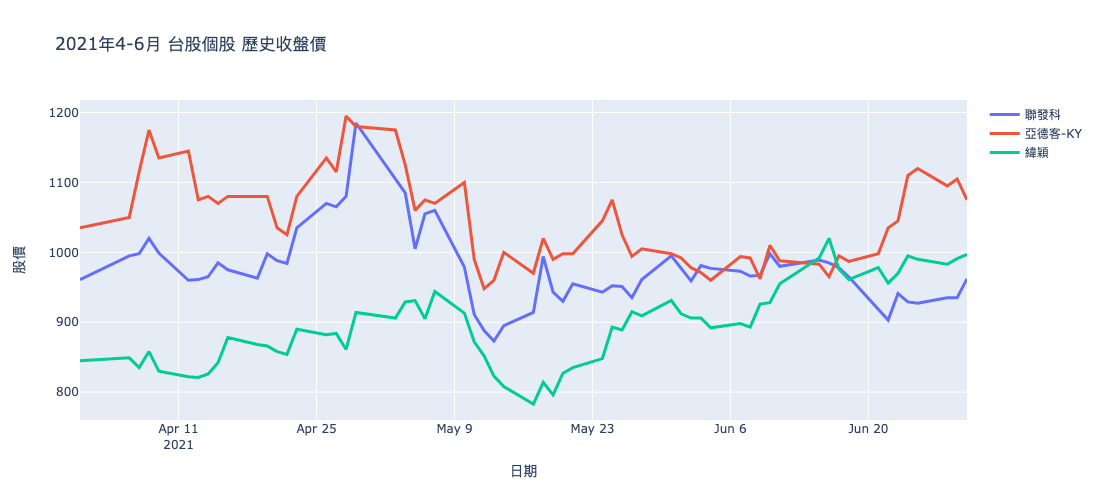

In [42]:
fig = go.Figure(data=[go.Scatter(x = df_2454['日期'], y = df_2454['收盤價'], name = '聯發科', line = dict(width=3)),
                      go.Scatter(x = df_1590['日期'], y = df_1590['收盤價'], name = '亞德客-KY', line = dict(width=3)),
                      go.Scatter(x = df_6669['日期'], y = df_6669['收盤價'], name = '緯穎', line = dict(width=3)) ])



# Set x-axis title
fig.update_xaxes(title_text="日期")

# Set y-axis title
fig.update_yaxes(title_text="股價")


fig.update_layout(
    title_text="2021年4-6月 台股個股 歷史收盤價",
    width = 1000,
    height = 500
)
fig.show()